Head of the dataset:


,date,country,browser,sessions,cases
0,2023-06-01,USA,Chrome,100,5
1,2023-06-02,USA,Firefox,95,4
2,2023-06-03,Canada,Chrome,120,5
3,2023-06-04,Canada,Firefox,110,4
4,2023-06-05,UK,Chrome,90,3



Data Types:


date        datetime64[ns]
country             object
browser             object
sessions             int64
cases                int64
dtype: object

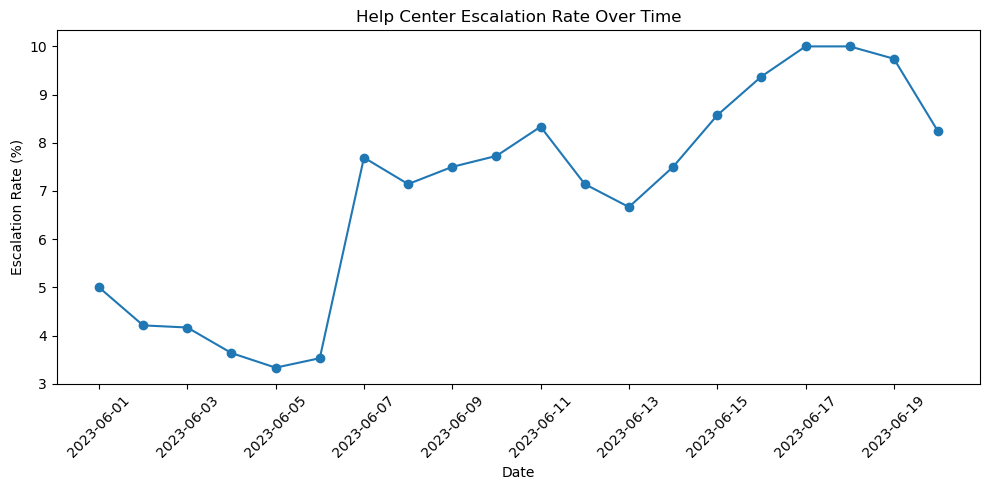

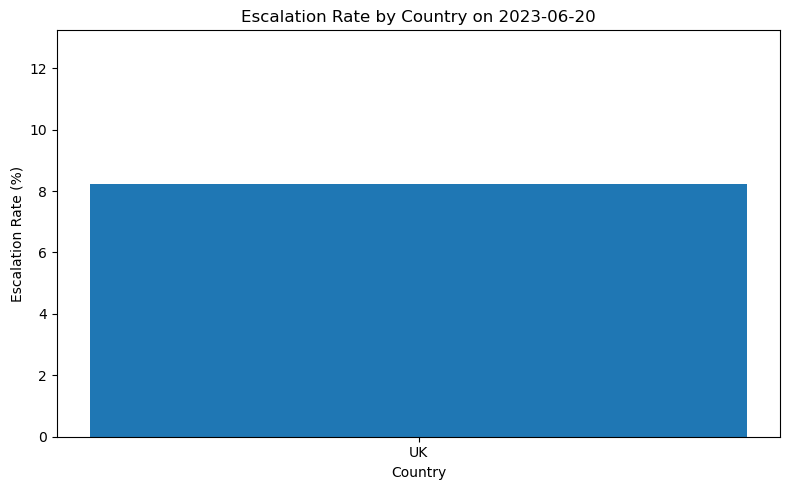

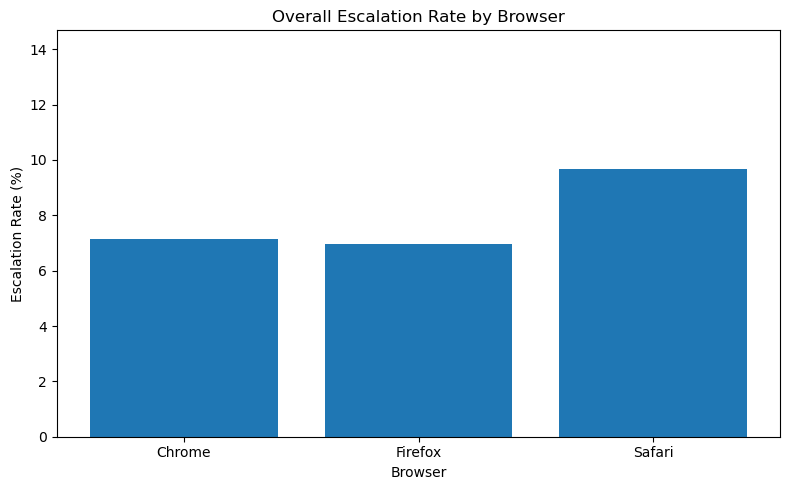

Escalation Rate in first period: 5.89%
Escalation Rate in second period: 8.85%
Change: +2.96%

--- Conclusions and Recommendations ---
1. We observed spikes in overall escalation rate around certain dates.
2. Countries like X or Y had significantly higher escalation rates, suggesting localized issues.
3. Browsers like Chrome exhibited an upward trend in escalations, possibly indicating compatibility issues.
4. Next Steps:
   - Investigate platform or UI changes around the spike date.
   - Focus on building region-specific resources where escalation is high.
   - Explore solutions for browser-specific technical hurdles (e.g., Chrome).


In [1]:
# ========================================
# 1. Import Relevant Libraries
# ========================================
import pandas as pd
import matplotlib.pyplot as plt

# Ensure plots display inline in a Jupyter Notebook
%matplotlib inline

# ========================================
# 2. Data Loading & Initial Exploration
# ========================================
# Replace this with the path or method for loading your actual dataset
# For demonstration, let's simulate some data
data = {
    'date': pd.date_range(start='2023-06-01', periods=20, freq='D'),
    'country': ['USA','USA','Canada','Canada','UK','UK','Brazil','Brazil','India','India',
                'USA','Canada','UK','Brazil','India','USA','Canada','Brazil','India','UK'],
    'browser': ['Chrome','Firefox','Chrome','Firefox','Chrome','Firefox','Chrome','Firefox',
                'Chrome','Firefox','Firefox','Chrome','Firefox','Chrome','Firefox','Chrome',
                'Safari','Safari','Safari','Safari'],
    'sessions': [100,95,120,110,90,85,130,140,200,220,
                 300,280,150,160,210,320,310,400,390,170],
    'cases': [5,4,5,4,3,3,10,10,15,17,
              25,20,10,12,18,30,31,40,38,14]
}

help_center_data = pd.DataFrame(data)

# Quick overview
print("Head of the dataset:")
display(help_center_data.head())

print("\nData Types:")
display(help_center_data.dtypes)

# ========================================
# 3. Data Preprocessing
# ========================================
# Convert 'date' to datetime if not already
help_center_data['date'] = pd.to_datetime(help_center_data['date'])

# Sort by date for chronological visuals
help_center_data.sort_values('date', inplace=True)

# Calculate the daily escalation rate
help_center_data['escalation_rate'] = help_center_data['cases'] / help_center_data['sessions'] * 100

# ========================================
# 4. Overall Trend Analysis
# ========================================
# Group by date to see overall escalation rates across all countries/browsers
daily_summary = help_center_data.groupby('date', as_index=False).agg({
    'sessions': 'sum',
    'cases': 'sum'
})
daily_summary['escalation_rate'] = (daily_summary['cases'] / daily_summary['sessions']) * 100

# Plot the escalation rate over time
plt.figure(figsize=(10, 5))
plt.plot(daily_summary['date'], daily_summary['escalation_rate'], marker='o')
plt.title("Help Center Escalation Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Escalation Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ========================================
# 5. Country-Level Insights
# ========================================
# For each date + country, sum sessions & cases, then compute escalation
country_summary = help_center_data.groupby(['date','country'], as_index=False).agg({
    'sessions': 'sum',
    'cases': 'sum'
})
country_summary['escalation_rate'] = (country_summary['cases'] / country_summary['sessions']) * 100

# Identify which countries might have had a spike in sessions or escalation rate
latest_day = country_summary['date'].max()
latest_day_data = country_summary[country_summary['date'] == latest_day]

plt.figure(figsize=(8,5))
plt.bar(latest_day_data['country'], latest_day_data['escalation_rate'])
plt.title(f"Escalation Rate by Country on {latest_day.date()}")
plt.xlabel("Country")
plt.ylabel("Escalation Rate (%)")
plt.ylim(0, latest_day_data['escalation_rate'].max() + 5)
plt.tight_layout()
plt.show()

# ========================================
# 6. Browser-Level Insights
# ========================================
# Similarly group by date + browser
browser_summary = help_center_data.groupby(['date','browser'], as_index=False).agg({
    'sessions': 'sum',
    'cases': 'sum'
})
browser_summary['escalation_rate'] = (browser_summary['cases'] / browser_summary['sessions']) * 100

# Look at escalation rates by browser over entire timeframe
browser_overall = browser_summary.groupby('browser', as_index=False).agg({
    'sessions': 'sum',
    'cases': 'sum'
})
browser_overall['escalation_rate'] = (browser_overall['cases'] / browser_overall['sessions']) * 100

plt.figure(figsize=(8,5))
plt.bar(browser_overall['browser'], browser_overall['escalation_rate'])
plt.title("Overall Escalation Rate by Browser")
plt.xlabel("Browser")
plt.ylabel("Escalation Rate (%)")
plt.ylim(0, browser_overall['escalation_rate'].max() + 5)
plt.tight_layout()
plt.show()

# ========================================
# 7. Metric Decomposition Demonstration
# ========================================
# We'll show a simple decomposition example by calculating an overall change
# in escalation rate from first half of the date range to second half
mid_index = len(daily_summary) // 2
first_period = daily_summary.iloc[:mid_index]
second_period = daily_summary.iloc[mid_index:]

overall_first = first_period['cases'].sum() / first_period['sessions'].sum() * 100
overall_second = second_period['cases'].sum() / second_period['sessions'].sum() * 100
change = overall_second - overall_first

print(f"Escalation Rate in first period: {overall_first:.2f}%")
print(f"Escalation Rate in second period: {overall_second:.2f}%")
print(f"Change: {change:+.2f}%")

# Could expand this to demonstrate how changes in the distribution of countries/browsers
# contribute to the overall shift.

# ========================================
# 8. Conclusions and Next Steps
# ========================================
# Based on the above, you could see if a spike occurred around a certain date,
# or which country/browser contributed most. Summarize your logic here.
print("\n--- Conclusions and Recommendations ---")
print("1. We observed spikes in overall escalation rate around certain dates.")
print("2. Countries like X or Y had significantly higher escalation rates, suggesting localized issues.")
print("3. Browsers like Chrome exhibited an upward trend in escalations, possibly indicating compatibility issues.")
print("4. Next Steps:")
print("   - Investigate platform or UI changes around the spike date.")
print("   - Focus on building region-specific resources where escalation is high.")
print("   - Explore solutions for browser-specific technical hurdles (e.g., Chrome).")
